In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [2]:
# imports the csv from my github as a dataframe

df0 = pd.read_csv('https://raw.githubusercontent.com/SeanAntosiak/LS-DS6-Unit-2-Project/master/SDSSdataset.csv')

In [3]:
# looks at dataframe

df0.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [12]:
# redshift values for QSO are much higher but intensity is similar
# I will create features that tries to account for this

cols = ['u','g','r','i','z']

df1 = df0.copy()

for col in cols:
    df1[f'{col}RS']=(df1[col]*(df1['redshift']));

In [13]:
# checking to make sure features were added correctly

df1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,class,redshift,plate,mjd,fiberid,uRS,gRS,rRS,iRS,zRS
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,GALAXY,0.123111,287,52023,513,2.386262,2.239601,2.151280,2.103640,2.068422
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,GALAXY,0.100242,287,52023,559,1.943019,1.793330,1.714682,1.670431,1.640921
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,GALAXY,0.040508,288,52000,400,0.756388,0.717551,0.708634,0.700096,0.697811
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,GALAXY,0.072087,288,52000,389,1.388163,1.265039,1.199229,1.164155,1.136557
15,1.237650e+18,184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,752,301,...,QSO,0.271937,287,52023,587,5.095641,5.060642,5.002812,4.979638,4.888509


In [20]:
# sets initinal X features and y lables 
# using intensity(brightness) and redshift(distance) colums as features

X0 = df1[['u', 'g', 'r', 'i', 'z','uRS', 'gRS', 'rRS', 'iRS', 'zRS', 'redshift']]

y0 = df1['class']

In [21]:
# creating a train test split, and then again for a train validation split

X0train, X0test, y0train, y0test = tts(X0,y0, train_size=0.90, test_size=0.10, random_state=8)

X1train, X1val, y1train, y0val = tts(X0train,y0train, train_size=0.90, test_size=0.10, random_state=8)

In [22]:
# finding a baseline for majority class

y0.value_counts(normalize=True)

# predicting galaxy every time would result in an accuracy of almost 50%

GALAXY    0.4998
STAR      0.4152
QSO       0.0850
Name: class, dtype: float64

In [23]:
# settings a logistic regression model and scores it on test set

mod0 = LogReg(solver='lbfgs', multi_class='auto', max_iter=1000) # keywords set to silence warnings
mod0.fit(X1train,y1train)
mod0.score(X1val, y0val)

0.9822222222222222

In [24]:
# tries a basic RandomForestClassifier and scores it

mod1 = RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1) # keywords set to silence warnings
mod1.fit(X1train,y1train)
mod1.score(X1val, y0val)

0.9866666666666667

In [25]:
# checks importance values

importance = mod1.feature_importances_
pd.Series(importance, X1val.columns)

u           0.004696
g           0.003015
r           0.004510
i           0.008484
z           0.009167
uRS         0.138317
gRS         0.155127
rRS         0.172246
iRS         0.159121
zRS         0.115394
redshift    0.229923
dtype: float64

In [40]:
# creating dataframes that seperate out each class for graphing purposes
Star = df1[df1['class']=='STAR']
Galaxy = df1[df1['class']=='GALAXY']
QSO = df1[df1['class']=='QSO']

<function matplotlib.pyplot.show(*args, **kw)>

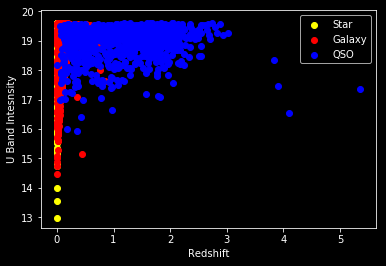

In [48]:
# ploting ultraviolet intensity against redshift

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(Galaxy['redshift'], Galaxy['u'],color='red', label='Galaxy')
ax.scatter(QSO['redshift'], QSO['u'], color='blue', label='QSO')

ax.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

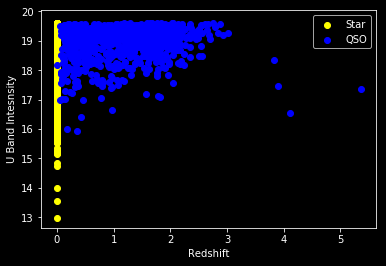

In [52]:
# ploting just QSO and stars

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(QSO['redshift'], QSO['u'], color='blue', label='QSO')

ax.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

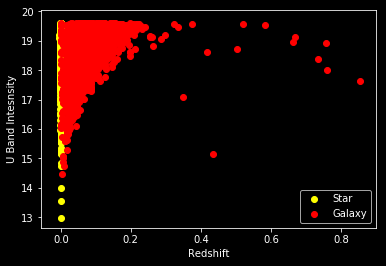

In [53]:
# ploting just stars and regular galaxies

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(Galaxy['redshift'], Galaxy['u'],color='red', label='Galaxy')

ax.legend()

plt.show